In [10]:
import scanpy as sc
import gdown
import os

sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [11]:
if not os.path.exists("tyser.h5ad"):
    url = 'https://drive.google.com/uc?id=1mJ8nYnDQdDUivZpAFIPoNPMppOUCRAPT'
    output = 'tyser.h5ad'
    gdown.download(url, output, quiet=False)
adata = sc.read('tyser.h5ad')

In [12]:
if not os.path.exists("hiPSC.h5ad"):
    url = 'https://drive.google.com/uc?id=1JGatjjXPXKZza5ksOWYHD2kJvUSDZG-0'
    output = 'hiPSC.h5ad'
    gdown.download(url, output, quiet=False)
hips =  sc.read("hiPSC.h5ad")

/home/luna/Desktop/in-house/.vnew/lib/python3.12/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [13]:
combined = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')

/tmp/ipykernel_65653/1762403414.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')


In [16]:
sc.pp.neighbors(combined)
sc.tl.umap(combined)


AnnData object with n_obs × n_vars = 5763 × 21482
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'batch_join'
    var: 'features'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

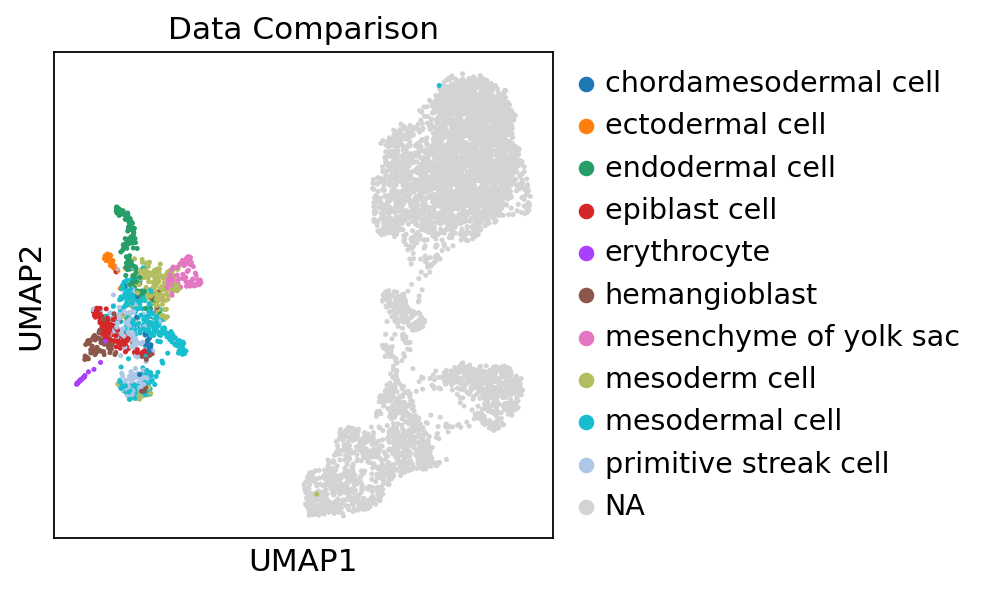

In [21]:
sc.pl.umap(combined,color=['Characteristics.inferred.cell.type...ontology.labels.'],title=["Data Comparison"], frameon=True)

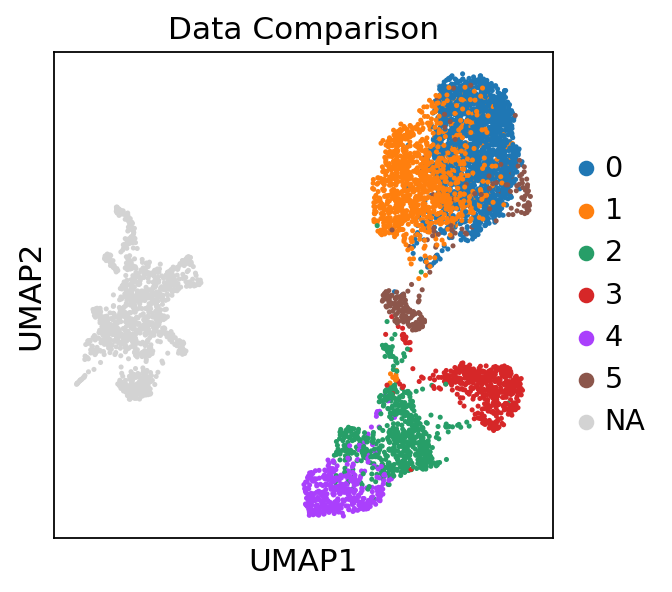

In [23]:
sc.pl.umap(combined,color=['seurat_clusters'],title=["Data Comparison"], frameon=True)